# Modeling: Predictive Insights from Portuguese Bank Marketing Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from tabulate import tabulate

# Data

In [2]:
# Load the data
data_bank = pd.read_csv('data_bank.csv')

In [3]:
# Separate the features and target variable; drop 'duration' variable since it is available after the call 
X = data_bank.drop(['target','duration'], axis=1)
y = data_bank['target']

In [4]:
# Converting categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

In [5]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Modeling
# Logistic Regression
Hyperparameter tuning for a Logistic Regression model using `GridSearchCV` class from `scikit-learn`. 

In [6]:
from sklearn.model_selection import GridSearchCV

lr=LogisticRegression()
params = {"C": [.001, .01, .1 ,1 ,10], "penalty": ["l1", "l2"], "solver":["liblinear"], "max_iter":[1000] }
gs = GridSearchCV(lr, param_grid = params, scoring = "roc_auc")
gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [7]:
gs.best_estimator_

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

In [8]:
gs.best_params_

{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

In [9]:
gs.best_score_ 

0.7686832758121489

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest model
rf = RandomForestClassifier()

# parameter grid
params = {
    "n_estimators": [50, 100, 250],
    "max_depth": [1, 5, 20, None],
    "max_features": ["sqrt", 0.1, 0.5]
}

# GridSearchCV object
gs_rf = GridSearchCV(rf, param_grid=params, scoring="roc_auc")

# Fitting the GridSearchCV to training data
gs_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 20, None],
                         'max_features': ['sqrt', 0.1, 0.5],
                         'n_estimators': [50, 100, 250]},
             scoring='roc_auc')

In [12]:
# the best parameters recommended by GridSearchCV
rf_best_params = gs_rf.best_params_
print(rf_best_params)

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 250}


In [13]:
# best random forest model from GridSearchCV
best_rf_model = gs_rf.best_estimator_

# XGBoost

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# XGBoost model
xgb = XGBClassifier()

# parameter grid
params = {
    "max_depth": [1, 5, 20, None],
    "min_child_weight": [1, 3, 5, 10]
}

# GridSearchCV object
gs_xgb = GridSearchCV(xgb, param_grid=params, scoring="roc_auc")

# Fitting GridSearchCV to training data
gs_xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_c

In [15]:
# best parameters recommended by GridSearchCV
xgb_best_params = gs_xgb.best_params_
print(xgb_best_params)

{'max_depth': 5, 'min_child_weight': 10}


# ROC AUC scores for 3 models

In [16]:
from sklearn.metrics import roc_auc_score

# y_test = true labels of the test dataset

# For Logistic Regression
lr_predictions = gs.predict_proba(X_test)[:, 1] # Predicted probabilities for class 1
lr_roc_auc = roc_auc_score(y_test, lr_predictions) # Calculate ROC AUC
print("ROC AUC for Logistic Regression: ", lr_roc_auc) 

# For Random Forest
rf_predictions = gs_rf.predict_proba(X_test)[:, 1] # Predicted probabilities for class 1
rf_roc_auc = roc_auc_score(y_test, rf_predictions) # Calculate ROC AUC
print("ROC AUC for Random Forest: ", rf_roc_auc) 

# For XGBoost
xgb_predictions = gs_xgb.predict_proba(X_test)[:, 1] # Predicted probabilities for class 1
xgb_roc_auc = roc_auc_score(y_test, xgb_predictions) # Calculate ROC AUC
print("ROC AUC for XGBoost: ", xgb_roc_auc) 

ROC AUC for Logistic Regression:  0.7575128820586212
ROC AUC for Random Forest:  0.7965733216899934
ROC AUC for XGBoost:  0.7898936930473769


# ROC AUC curve for 3 models

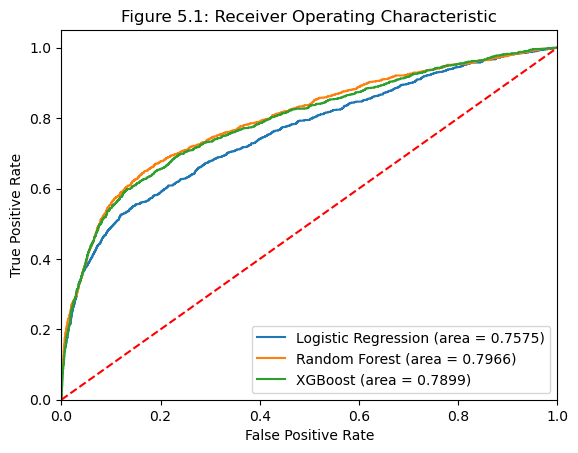

<Figure size 640x480 with 0 Axes>

In [17]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# For Logistic Regression
fpr, tpr, _ = roc_curve(y_test, lr_predictions)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % lr_roc_auc)

# For Random Forest
fpr, tpr, _ = roc_curve(y_test, rf_predictions)
plt.plot(fpr, tpr, label='Random Forest (area = %0.4f)' % rf_roc_auc)

# For XGBoost
fpr, tpr, _ = roc_curve(y_test, xgb_predictions)
plt.plot(fpr, tpr, label='XGBoost (area = %0.4f)' % xgb_roc_auc)

# Plotting ROC for all models
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 5.1: Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Save the plot
plt.savefig('ROC_curve.png')

# Threshold vs. Profitability curve 
This function first applies the threshold to the predicted probabilities to get the predicted classes. It then calculates the number of true positives and the number of predicted positives. The revenue is calculated as the number of true positives times the revenue per subscription, and the cost is calculated as the number of predicted positives times the cost per call. The profit is then the difference between the revenue and the cost.

I then define the revenue per subscription and the cost per call and a range of thresholds. I calculate the profit for each threshold and plot the threshold vs the profitability.

# threshold vs profitability on the train set

Function `calculate_profit` that computes the profit based on a binary classification model's predictions. The function takes the following parameters:

- `y_pred`: Predicted probabilities for the positive class.
- `y_true`: True binary labels or ground truth target values.
- `threshold`: Threshold for classifying samples as positive or negative.
- `revenue_per_sub`: Revenue generated per subscription.
- `cost_per_call`: Cost incurred per call.

In [18]:
def calculate_profit(y_pred, y_true, threshold, revenue_per_sub, cost_per_call):
    # Apply threshold to positive probabilities
    y_pred_threshold = (y_pred > threshold).astype(int)
    
    # Calculate true positives
    true_positives = np.sum((y_pred_threshold == 1) & (y_true == 1))
    
    # Calculate predicted positives
    predicted_positives = np.sum(y_pred_threshold)
    
    # Calculate revenue and cost
    revenue = true_positives * revenue_per_sub
    cost = predicted_positives * cost_per_call
    
    # Calculate profit
    profit = revenue - cost
    
    return profit

# Define revenue per subscription and cost per call
revenue_per_sub = 30  # assumed value, deposit = 1000 euros, net investment margin at 3%, revenue per sub is 30 euros
cost_per_call = 6  # cost per call according to www.qualtrics.com

# Define range of thresholds
thresholds = np.linspace(0, 1, 100)

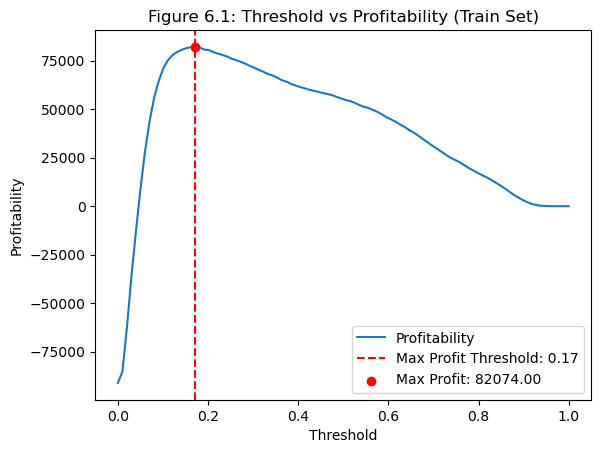

<Figure size 640x480 with 0 Axes>

In [20]:
# train set from the random forest model to calculate profit
rf_train_predictions = best_rf_model.predict_proba(X_train)[:, 1]  # training set predictions from the random forest model
profits_train = [calculate_profit(rf_train_predictions, y_train, threshold, revenue_per_sub, cost_per_call) 
                 for threshold in thresholds]

# index of the maximum profit on train set
max_index_train = np.argmax(profits_train)
max_threshold_train = thresholds[max_index_train]

# maximum profit at max threshold
max_profit_train = profits_train[max_index_train]

# Plot threshold vs profitability on the train set
plt.plot(thresholds, profits_train, label='Profitability')
plt.axvline(x=max_threshold_train, color='r', linestyle='--', label=f'Max Profit Threshold: {max_threshold_train:.2f}')  
plt.scatter(max_threshold_train, max_profit_train, color='r', label=f'Max Profit: {max_profit_train:.2f}', zorder=5)  
plt.xlabel('Threshold')
plt.ylabel('Profitability')
plt.title('Figure 6.1: Threshold vs Profitability (Train Set)')
plt.legend()
plt.show()

# Save the plot 
plt.savefig('threshold_vs_profitability_train.png')

# threshold vs profitability on the test set

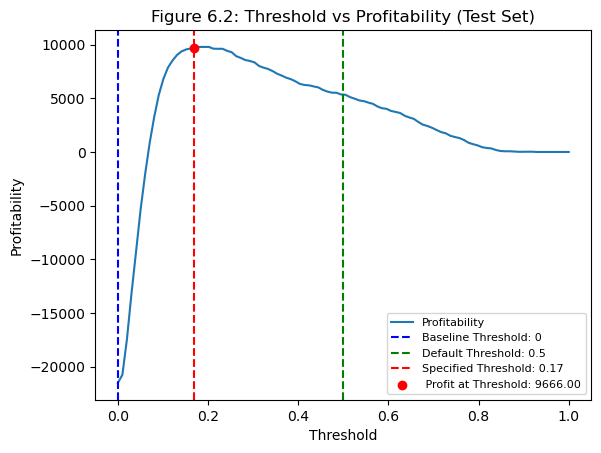

<Figure size 640x480 with 0 Axes>

In [28]:
# test set from the random forest model to calculate profit
rf_test_predictions = best_rf_model.predict_proba(X_test)[:, 1]

# threshold of 0.17 from the train set
threshold_train = 0.17

profits_test = [calculate_profit(rf_test_predictions, y_test, threshold_train, revenue_per_sub, cost_per_call) 
                for _ in range(len(X_test))]

# maximum profit at the specified threshold
max_profit_test = max(profits_test)

# range of thresholds for plotting
thresholds = np.linspace(0, 1, 100)

# profits for each threshold in the test set
profits = [calculate_profit(rf_test_predictions, y_test, t, revenue_per_sub, cost_per_call) for t in thresholds]

# Plot threshold vs profitability on the test set
plt.plot(thresholds, profits, label='Profitability')
plt.axvline(x=0, color='b', linestyle='--', label='Baseline Threshold: 0')  # baseline at the threshold of 0
plt.axvline(x=0.5, color='g', linestyle='--', label='Default Threshold: 0.5')  # default threshold at 0.5
plt.axvline(x=threshold_train, color='r', linestyle='--', label=f'Specified Threshold: {threshold_train:.2f}')  
plt.scatter(threshold_train, max_profit_test, color='r', label=f' Profit at Threshold: {max_profit_test:.2f}', zorder=5)  
plt.xlabel('Threshold')
plt.ylabel('Profitability')
plt.title('Figure 6.2: Threshold vs Profitability (Test Set)')
plt.legend(fontsize='8')  
plt.show()

# Save the plot
plt.savefig('threshold_vs_profitability_test.png')

In [30]:
# number of people called using the predictions
called_people_train = np.sum(rf_train_predictions > 0.17)  # Number of people predicted to subscribe
called_people_test = np.sum(rf_test_predictions > 0.17)  # Number of people predicted to subscribe

print(f"Number of people called in the train set: {called_people_train}")
print(f"Number of people called in the test set: {called_people_test}")

Number of people called in the train set: 5416
Number of people called in the test set: 1544


# Calculate Profit: 

In [31]:
calculate_profit(rf_test_predictions, y_test, 0.17, 30, 6)

9666

In [32]:
# default threshold 0.5
calculate_profit(rf_test_predictions, y_test, 0.5, 30, 6)

5352

# Classification Report: Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# using the max profit threshold of 0.17 from the test set:
print(rf_test_predictions)
print(rf_test_predictions <= 0.17)

predictions = (rf_test_predictions > 0.17)

report_train = classification_report(y_test,predictions)
print(report_train)

[0.03175616 0.0387136  0.12255914 ... 0.01163416 0.03274623 0.03414496]
[ True  True  True ...  True  True  True]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7952
           1       0.41      0.58      0.48      1091

    accuracy                           0.85      9043
   macro avg       0.67      0.73      0.70      9043
weighted avg       0.87      0.85      0.86      9043

